In [1]:
# import sys
# !{sys.executable} -m pip install seaborn --user

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mtu = 1024 # Bytes
ipHdrSize = 20

torBw = 200e9 # bps
linkDelay = 50e-9 # seconds
oneWayDelay = 2 * (mtu*8/torBw + linkDelay)
bdpPkts = 7 # packets

protocols = ['Ndp', 'Homa']
buffSizes = ['80p', '40p']
hdrSizes = {'Ndp': 15, 'Homa': 20}

In [4]:
def removeKey(d, key):
    r = dict(d)
    del r[key]
    return r

In [5]:
def calculateMsgSizePkts(msgSize, protocol):
    return msgSize / (mtu - ipHdrSize - hdrSizes[protocol])

# Importing MsgTrace Data

In [6]:
msgTrDfCols = ['protocol','buffSize','msgId','sizePkts','start','finish']
msgTrDfData = {}
for col in msgTrDfCols:
    msgTrDfData[col] = []
    
for protocol in protocols:
    for buffSize in buffSizes:
        
        msgStatTimeHolder = {}
        with open(protocol+"-Buff"+buffSize+"-MsgTraces.tr",'r') as f:
            for line in f:
                msgLog = line.split()

                time = float(msgLog[1])*1e-9 # in seconds
                msgSize = int(msgLog[2])     # in bytes
                sender = msgLog[3]           # ip:port
                receiver = msgLog[4]         # ip:port

                key = int(receiver.split(':')[1]) # DstPort

                if (msgLog[0]=='+'):
                    msgStatTimeHolder[key] = time

                elif (msgLog[0] =='-'):
                    msgTrDfData['protocol'].append(protocol)
                    msgTrDfData['buffSize'].append(buffSize)
                    msgTrDfData['msgId'].append(key)
                    msgTrDfData['sizePkts'].append(calculateMsgSizePkts(msgSize, protocol))
                    msgTrDfData['start'].append(msgStatTimeHolder[key])
                    msgTrDfData['finish'].append(time)
                    removeKey(msgStatTimeHolder, key)
                    
msgTrDf = pd.DataFrame(data=msgTrDfData)
msgTrDf['mct'] = (msgTrDf.finish - msgTrDf.start)
msgTrDf['ict'] = (msgTrDf.sizePkts - 1) * 8 * mtu / torBw + oneWayDelay
msgTrDf['slowDown'] = msgTrDf.mct / msgTrDf.ict

In [7]:
msgTrDf

,buffSize,finish,msgId,protocol,sizePkts,start,mct,ict,slowDown
0,80p,1.000004,1,Ndp,10.0,1.0,0.000004,5.505600e-07,7.032839
1,80p,1.000005,2,Ndp,12.0,1.0,0.000005,6.324800e-07,7.353592
2,80p,1.000005,3,Ndp,14.0,1.0,0.000005,7.144000e-07,7.486002
3,80p,1.000006,4,Ndp,16.0,1.0,0.000006,7.963200e-07,7.488196
4,80p,1.000006,5,Ndp,18.0,1.0,0.000006,8.782400e-07,7.396611
5,80p,1.000007,6,Ndp,20.0,1.0,0.000007,9.601600e-07,7.235252
6,80p,1.000007,7,Ndp,22.0,1.0,0.000007,1.042080e-06,7.020574
7,80p,1.000008,8,Ndp,24.0,1.0,0.000008,1.124000e-06,6.764235
8,80p,1.000008,9,Ndp,26.0,1.0,0.000008,1.205920e-06,6.474725
9,80p,1.000008,10,Ndp,28.0,1.0,0.000008,1.287840e-06,6.158374


# Importing Queue Occupancy Data

In [8]:
qlenDfCols = ['protocol','buffSize','time','qLen']
qlenDfData = {}
for col in qlenDfCols:
    qlenDfData[col] = []
    
for protocol in protocols:
    for buffSize in buffSizes:
        
        msgStatTimeHolder = {}
        with open(protocol+"-Buff"+buffSize+".qlen",'r') as f:
            for line in f:
                msgLog = line.split()

                time = float(msgLog[0])*1e-9 # in seconds
                qlen = int(msgLog[1])     # in bytes
                
                qlenDfData['protocol'].append(protocol)
                qlenDfData['buffSize'].append(buffSize)
                qlenDfData['time'].append(time)
                qlenDfData['qLen'].append(qlen)
                    
qlenDf = pd.DataFrame(data=qlenDfData)

In [9]:
# qlenDf

# Plotting Figures

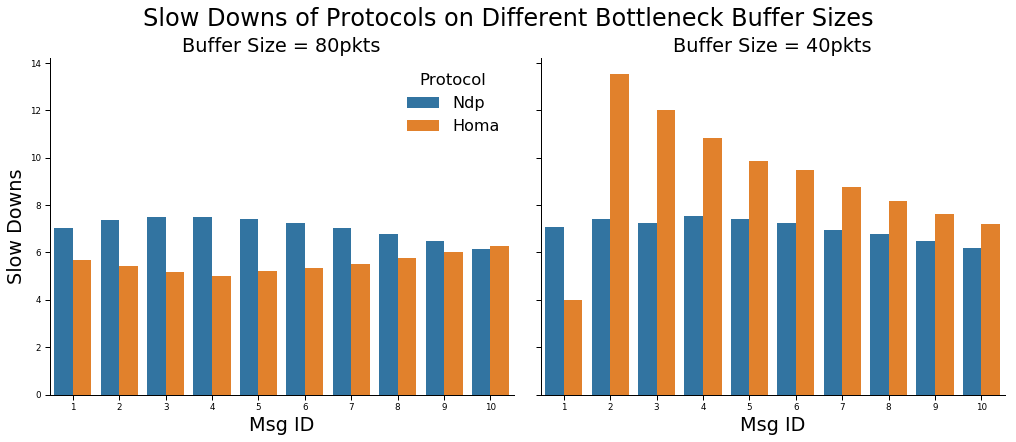

In [37]:
fontsize = 16
sns.set_context("paper", 
                rc={"font.size":fontsize,
                    "axes.titlesize":fontsize*1.5,
                    "axes.labelsize":fontsize*1.2}) 

g = sns.catplot(data = msgTrDf, x = "msgId", y = "slowDown",
                hue = "protocol", col = "buffSize", kind = "bar", 
                legend=True, legend_out=False,
                height=6, aspect=1.2)
g.set_axis_labels("Msg ID", "Slow Downs")
g.set_titles('Buffer Size = {col_name}kts')
g.add_legend(title='Protocol',fontsize=fontsize, frameon=False)
st = plt.suptitle('Slow Downs of Protocols on Different Bottleneck Buffer Sizes',
                  y=1.03, fontsize=fontsize*1.5)
plt.tight_layout()
plt.savefig("MsgSlowDownsPerProtocol.png", 
            bbox_extra_artists=[st], bbox_inches='tight')
plt.show()

In [11]:
for (protocol, buffSize), df in msgTrDf.groupby(['protocol','buffSize']):
    print('Slowdown stats for '+protocol+' ('+buffSize+'):')
    print(df.slowDown.describe([0.5,0.9])[['50%','90%']])

Slowdown stats for Homa (40p):
50%     9.108724
90%    12.176168
Name: slowDown, dtype: float64
Slowdown stats for Homa (80p):
50%    5.467177
90%    6.054853
Name: slowDown, dtype: float64
Slowdown stats for Ndp (40p):
50%    7.156145
90%    7.434529
Name: slowDown, dtype: float64
Slowdown stats for Ndp (80p):
50%    7.134046
90%    7.486222
Name: slowDown, dtype: float64


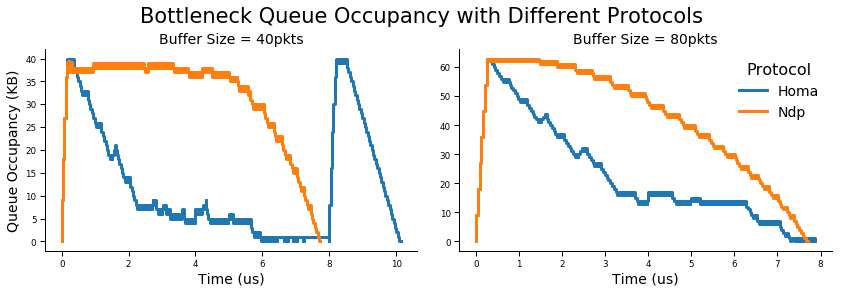

In [63]:
fontsize = 14
plt.figure(figsize=(12,4))
i=1
for (buffSize), df in qlenDf.groupby(['buffSize']):
    plt.subplot(1,len(buffSizes),i)
    for (protocol), dff in df.groupby(['protocol']):
        plt.step((dff.time-dff.time.min())*1e6, dff.qLen/1024, label=protocol, linewidth=3.)
        if (i==1): plt.ylabel('Queue Occupancy (KB)',fontsize=fontsize)
        plt.xlabel('Time (us)',fontsize=fontsize)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().spines["top"].set_visible(False)
        plt.title('Buffer Size = {}kts'.format(buffSize), fontsize=fontsize)
    i +=1

plt.legend(title='Protocol', fontsize=fontsize, 
           frameon=False, markerscale=2.0)
# plt.grid()
st = plt.suptitle('Bottleneck Queue Occupancy with Different Protocols',
                  y=1.03, fontsize=fontsize*1.5)
plt.tight_layout()
plt.savefig("QueueOccupancyPerProtocol.png", 
            bbox_extra_artists=[st], bbox_inches='tight')
plt.show()